The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development needs help to manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

**Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?**

**Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?**

**Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?**

**Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?**

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
#read file from soda api
hpd = pd.read_json('https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$limit=50000&agency=HPD')

In [243]:
pd.options.display.max_columns = 35
hpd.head()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,cross_street_1,cross_street_2,descriptor,due_date,facility_type,incident_address,incident_zip,latitude,location,location_type,longitude,open_data_channel_type,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.026690e+09,BRONX,BRONX,2019-03-15T11:08:14.000,03 BRONX,DOOR/WINDOW,2019-03-01T21:38:38.000,NaN,NaN,DOOR,NaN,N/A,976 TINTON AVENUE,10456.0,40.823716,"{'type': 'Point', 'coordinates': [-73.90271211...",RESIDENTIAL BUILDING,-73.902712,PHONE,BRONX,Unspecified,2019-03-15T11:08:14.000,The Department of Housing Preservation and Dev...,Closed,TINTON AVENUE,41852268,1011176.0,239394.0
1,ADDRESS,HPD,Department of Housing Preservation and Develop...,1.020400e+09,MANHATTAN,NEW YORK,2019-03-15T12:13:20.000,10 MANHATTAN,DOOR/WINDOW,2019-02-11T21:18:55.000,NaN,NaN,WINDOW FRAME,NaN,N/A,269 WEST 154 STREET,10039.0,40.828192,"{'type': 'Point', 'coordinates': [-73.93704011...",RESIDENTIAL BUILDING,-73.937040,PHONE,MANHATTAN,Unspecified,2019-03-15T12:13:20.000,The Department of Housing Preservation and Dev...,Closed,WEST 154 STREET,41701051,1001674.0,241016.0
2,ADDRESS,HPD,Department of Housing Preservation and Develop...,3.081610e+09,BROOKLYN,BROOKLYN,2019-03-15T13:38:24.000,18 BROOKLYN,ELECTRIC,2019-02-13T15:26:25.000,NaN,NaN,NO LIGHTING,NaN,N/A,1044 EAST 93 STREET,11236.0,40.643965,"{'type': 'Point', 'coordinates': [-73.90636502...",RESIDENTIAL BUILDING,-73.906365,PHONE,BROOKLYN,Unspecified,2019-03-15T13:38:24.000,The Department of Housing Preservation and Dev...,Closed,EAST 93 STREET,41703969,1010235.0,173904.0
3,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.029640e+09,BRONX,BRONX,2019-03-15T10:04:22.000,03 BRONX,PAINT/PLASTER,2019-03-03T20:12:11.000,NaN,NaN,WALL,NaN,N/A,1384 BRISTOW STREET,10459.0,40.832673,"{'type': 'Point', 'coordinates': [-73.89502363...",RESIDENTIAL BUILDING,-73.895024,PHONE,BRONX,Unspecified,2019-03-15T10:04:22.000,The Department of Housing Preservation and Dev...,Closed,BRISTOW STREET,41863585,1013300.0,242660.0
4,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.038660e+09,BRONX,BRONX,2019-03-15T15:57:44.000,09 BRONX,ELECTRIC,2019-03-04T15:04:56.000,NaN,NaN,OUTLET/SWITCH,NaN,N/A,1334 MANOR AVENUE,10472.0,40.832411,"{'type': 'Point', 'coordinates': [-73.87719076...",RESIDENTIAL BUILDING,-73.877191,PHONE,BRONX,Unspecified,2019-03-15T15:57:44.000,The Department of Housing Preservation and Dev...,Closed,MANOR AVENUE,41870641,1018235.0,242571.0


In [245]:
hpd.isnull().sum()

address_type                        384
agency                                0
agency_name                           0
bbl                                 497
borough                               0
city                                395
closed_date                        8065
community_board                       0
complaint_type                        0
created_date                          0
cross_street_1                    49748
cross_street_2                    49748
descriptor                            0
due_date                          49628
facility_type                         0
incident_address                    372
incident_zip                        397
latitude                            397
location                            397
location_type                       372
longitude                           397
open_data_channel_type                0
park_borough                          0
park_facility_name                    0
resolution_action_updated_date       97


In [246]:
#drop columns with excess null values
hpd = hpd.drop(['facility_type', 'cross_street_1', 'cross_street_2', 'due_date'], axis=1)

In [247]:
hpd = hpd.dropna()

In [248]:
#convert date columns to datetime objects
from datetime import datetime
hpd['closed_date'] = pd.to_datetime(hpd['closed_date'])
hpd['created_date'] = pd.to_datetime(hpd['created_date'])

In [249]:
hpd['consumed_time'] = hpd['closed_date']-hpd['created_date']

In [250]:
hpd['consumed_hours'] = hpd['consumed_time']/np.timedelta64(1,'h')

In [251]:
pd.options.display.max_columns = 35
hpd.head()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,descriptor,incident_address,incident_zip,latitude,location,location_type,longitude,open_data_channel_type,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,consumed_time,consumed_hours
0,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.026690e+09,BRONX,BRONX,2019-03-15 11:08:14,03 BRONX,DOOR/WINDOW,2019-03-01 21:38:38,DOOR,976 TINTON AVENUE,10456.0,40.823716,"{'type': 'Point', 'coordinates': [-73.90271211...",RESIDENTIAL BUILDING,-73.902712,PHONE,BRONX,Unspecified,2019-03-15T11:08:14.000,The Department of Housing Preservation and Dev...,Closed,TINTON AVENUE,41852268,1011176.0,239394.0,13 days 13:29:36,325.493333
1,ADDRESS,HPD,Department of Housing Preservation and Develop...,1.020400e+09,MANHATTAN,NEW YORK,2019-03-15 12:13:20,10 MANHATTAN,DOOR/WINDOW,2019-02-11 21:18:55,WINDOW FRAME,269 WEST 154 STREET,10039.0,40.828192,"{'type': 'Point', 'coordinates': [-73.93704011...",RESIDENTIAL BUILDING,-73.937040,PHONE,MANHATTAN,Unspecified,2019-03-15T12:13:20.000,The Department of Housing Preservation and Dev...,Closed,WEST 154 STREET,41701051,1001674.0,241016.0,31 days 14:54:25,758.906944
2,ADDRESS,HPD,Department of Housing Preservation and Develop...,3.081610e+09,BROOKLYN,BROOKLYN,2019-03-15 13:38:24,18 BROOKLYN,ELECTRIC,2019-02-13 15:26:25,NO LIGHTING,1044 EAST 93 STREET,11236.0,40.643965,"{'type': 'Point', 'coordinates': [-73.90636502...",RESIDENTIAL BUILDING,-73.906365,PHONE,BROOKLYN,Unspecified,2019-03-15T13:38:24.000,The Department of Housing Preservation and Dev...,Closed,EAST 93 STREET,41703969,1010235.0,173904.0,29 days 22:11:59,718.199722
3,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.029640e+09,BRONX,BRONX,2019-03-15 10:04:22,03 BRONX,PAINT/PLASTER,2019-03-03 20:12:11,WALL,1384 BRISTOW STREET,10459.0,40.832673,"{'type': 'Point', 'coordinates': [-73.89502363...",RESIDENTIAL BUILDING,-73.895024,PHONE,BRONX,Unspecified,2019-03-15T10:04:22.000,The Department of Housing Preservation and Dev...,Closed,BRISTOW STREET,41863585,1013300.0,242660.0,11 days 13:52:11,277.869722
4,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.038660e+09,BRONX,BRONX,2019-03-15 15:57:44,09 BRONX,ELECTRIC,2019-03-04 15:04:56,OUTLET/SWITCH,1334 MANOR AVENUE,10472.0,40.832411,"{'type': 'Point', 'coordinates': [-73.87719076...",RESIDENTIAL BUILDING,-73.877191,PHONE,BRONX,Unspecified,2019-03-15T15:57:44.000,The Department of Housing Preservation and Dev...,Closed,MANOR AVENUE,41870641,1018235.0,242571.0,11 days 00:52:48,264.880000


### Top complaint type
Our first objective is to find out top complaint type.

In [252]:
hpd['complaint_type'].value_counts()

HEAT/HOT WATER          11966
UNSANITARY CONDITION     6406
PAINT/PLASTER            4644
PLUMBING                 4060
DOOR/WINDOW              3135
WATER LEAK               2864
GENERAL                  2090
FLOORING/STAIRS          2062
ELECTRIC                 2041
APPLIANCE                1071
SAFETY                    824
ELEVATOR                  121
OUTSIDE BUILDING           95
GENERAL CONSTRUCTION       58
HEATING                    48
PAINT - PLASTER            42
NONCONST                   35
CONSTRUCTION                1
Name: complaint_type, dtype: int64

In [253]:
hpd['complaint_type'] = hpd['complaint_type'].replace('PAINT - PLASTER', 'PAINT/PLASTER')

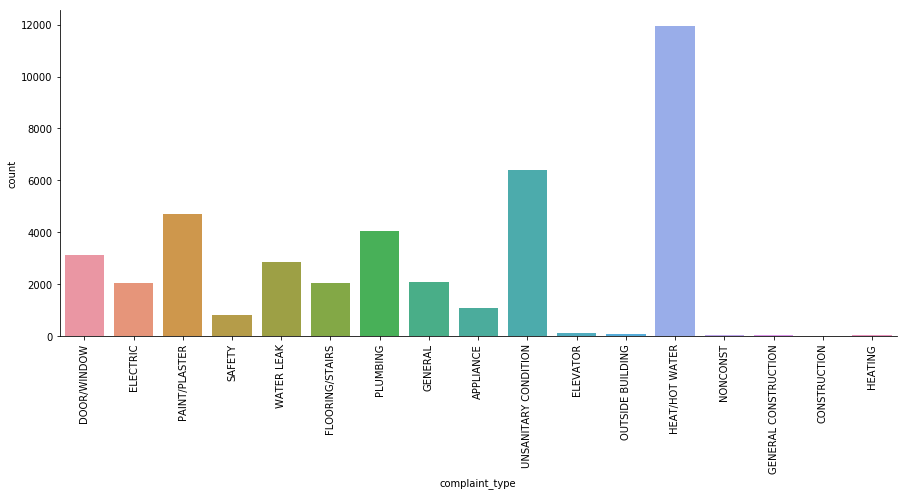

In [254]:
plt.figure(figsize=(15,6))
g = sns.countplot(hpd['complaint_type'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.despine()

While it is clear that there is an abundance of HEAT/HOT WATER complaint, we might want to look at it from a different point of view
Let's find out which type of complaint takes the **most time to resolve**. 

In [255]:
complain_group = hpd.groupby('complaint_type')

In [256]:
complain_group.mean()['consumed_hours'].sort_values()

complaint_type
HEAT/HOT WATER           56.484370
HEATING                  73.000000
GENERAL CONSTRUCTION    262.758621
NONCONST                276.342857
CONSTRUCTION            312.000000
OUTSIDE BUILDING        402.050801
PAINT/PLASTER           422.781905
FLOORING/STAIRS         430.942042
SAFETY                  451.785476
ELECTRIC                459.490268
PLUMBING                462.776585
GENERAL                 475.457031
WATER LEAK              482.417488
DOOR/WINDOW             503.192566
UNSANITARY CONDITION    519.315741
APPLIANCE               538.077533
ELEVATOR                630.775696
Name: consumed_hours, dtype: float64

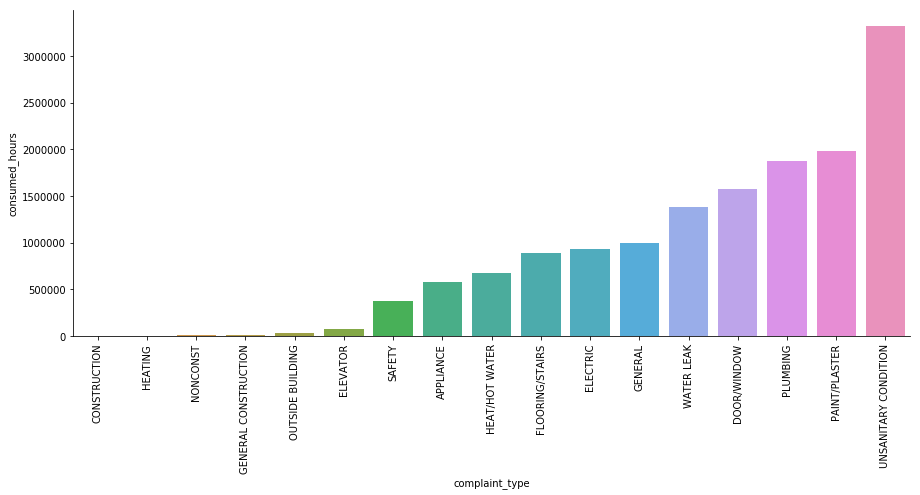

In [257]:
plt.figure(figsize=(15,6))
g = sns.barplot(complain_group.sum()['consumed_hours'].sort_values().index, complain_group.sum()['consumed_hours'].sort_values())
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.despine()

The mean consumed time to resolve an unsanitary condition is almost 10 times as high as that of a heat/hot water complaint.

This could be because an unsanitary condition requires clean up task which in turn requires more workforce and tools and equipment.

Even the total time taken to fix all of the unsanitary condition issue is about 5 times as much
On the other hand, a heat/hot water issue takes the least amount of time to fix

Whatsoever, this is reason enough to say that Department of Housing Preservation and Development of New York City should focus on the Unsanitary condition first

Now that we have the answer to our first question, let's check out if there is any borough that usually shows high complaint rate

In [258]:
hpd.head()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,descriptor,incident_address,incident_zip,latitude,location,location_type,longitude,open_data_channel_type,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,consumed_time,consumed_hours
0,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.026690e+09,BRONX,BRONX,2019-03-15 11:08:14,03 BRONX,DOOR/WINDOW,2019-03-01 21:38:38,DOOR,976 TINTON AVENUE,10456.0,40.823716,"{'type': 'Point', 'coordinates': [-73.90271211...",RESIDENTIAL BUILDING,-73.902712,PHONE,BRONX,Unspecified,2019-03-15T11:08:14.000,The Department of Housing Preservation and Dev...,Closed,TINTON AVENUE,41852268,1011176.0,239394.0,13 days 13:29:36,325.493333
1,ADDRESS,HPD,Department of Housing Preservation and Develop...,1.020400e+09,MANHATTAN,NEW YORK,2019-03-15 12:13:20,10 MANHATTAN,DOOR/WINDOW,2019-02-11 21:18:55,WINDOW FRAME,269 WEST 154 STREET,10039.0,40.828192,"{'type': 'Point', 'coordinates': [-73.93704011...",RESIDENTIAL BUILDING,-73.937040,PHONE,MANHATTAN,Unspecified,2019-03-15T12:13:20.000,The Department of Housing Preservation and Dev...,Closed,WEST 154 STREET,41701051,1001674.0,241016.0,31 days 14:54:25,758.906944
2,ADDRESS,HPD,Department of Housing Preservation and Develop...,3.081610e+09,BROOKLYN,BROOKLYN,2019-03-15 13:38:24,18 BROOKLYN,ELECTRIC,2019-02-13 15:26:25,NO LIGHTING,1044 EAST 93 STREET,11236.0,40.643965,"{'type': 'Point', 'coordinates': [-73.90636502...",RESIDENTIAL BUILDING,-73.906365,PHONE,BROOKLYN,Unspecified,2019-03-15T13:38:24.000,The Department of Housing Preservation and Dev...,Closed,EAST 93 STREET,41703969,1010235.0,173904.0,29 days 22:11:59,718.199722
3,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.029640e+09,BRONX,BRONX,2019-03-15 10:04:22,03 BRONX,PAINT/PLASTER,2019-03-03 20:12:11,WALL,1384 BRISTOW STREET,10459.0,40.832673,"{'type': 'Point', 'coordinates': [-73.89502363...",RESIDENTIAL BUILDING,-73.895024,PHONE,BRONX,Unspecified,2019-03-15T10:04:22.000,The Department of Housing Preservation and Dev...,Closed,BRISTOW STREET,41863585,1013300.0,242660.0,11 days 13:52:11,277.869722
4,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.038660e+09,BRONX,BRONX,2019-03-15 15:57:44,09 BRONX,ELECTRIC,2019-03-04 15:04:56,OUTLET/SWITCH,1334 MANOR AVENUE,10472.0,40.832411,"{'type': 'Point', 'coordinates': [-73.87719076...",RESIDENTIAL BUILDING,-73.877191,PHONE,BRONX,Unspecified,2019-03-15T15:57:44.000,The Department of Housing Preservation and Dev...,Closed,MANOR AVENUE,41870641,1018235.0,242571.0,11 days 00:52:48,264.880000


In [259]:
hpd['borough_code'] = hpd['incident_zip']/100
hpd['borough_code'] = hpd['borough_code'].astype(int)
hpd['borough_code'].value_counts()

104    13677
112    13485
100     7933
113     2471
114     1646
103      893
111      661
116      562
101      218
102       10
110        7
Name: borough_code, dtype: int64

In [260]:
borough_map = {112: 'brooklyn', 104: 'bronx', 100: 'manhattan', 113: 'queens', 114: 'queens', 103: 'staten island', 116: 'queens', 111: 'queens', 101: 'manhattan'}
hpd['borough'] = hpd['borough_code'].map(borough_map)
hpd['borough'].value_counts()

bronx            13677
brooklyn         13485
manhattan         8151
queens            5340
staten island      893
Name: borough, dtype: int64

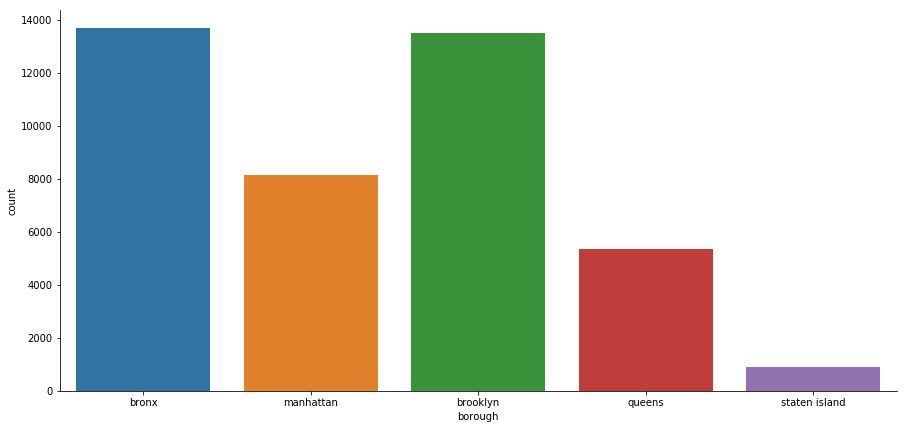

In [261]:
plt.figure(figsize=(15,7))
g = sns.countplot(hpd['borough'])
g.set_xticklabels(g.get_xticklabels(), rotation=False)
#plt.legend(loc='upper right')
sns.despine()

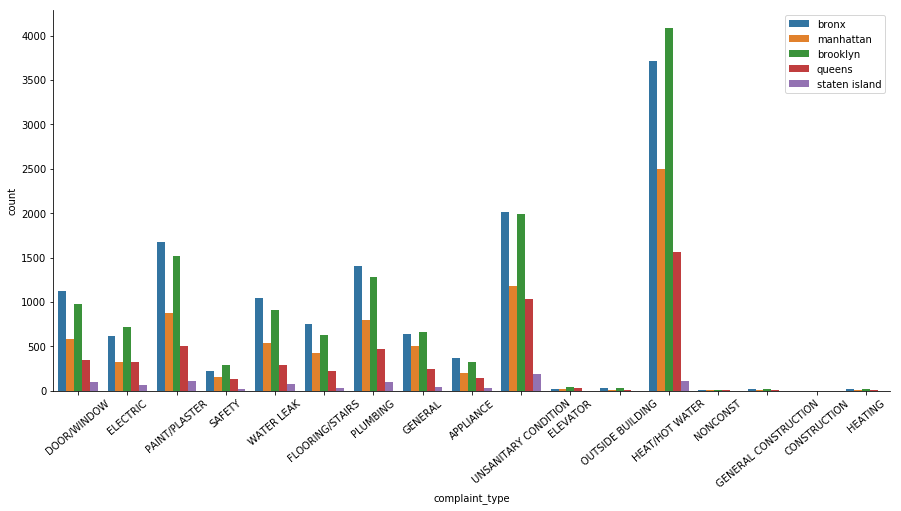

In [262]:
plt.figure(figsize=(15,7))
g = sns.countplot(hpd['complaint_type'], hue=hpd['borough'])
g.set_xticklabels(g.get_xticklabels(), rotation=40)
plt.legend(loc='upper right')
sns.despine()

Both Bronx and Brooklyn shows the highest rate of complaints with neglegible differneces.
As an answer to the second question, we can say that the focus should be equaly on these two boroughs

In order to do more analysis we will require data on the carachteristics of the lots and houses from where the complaints have been recorded.

We will use the PLUTO dataset for housing.
This dataset for housing can be accessed from https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-PLUTO-/xuk2-nczf. After you download the data, we will use only the part that is specific to the borough that you are interested in based on your analysis. In our case, BRONX

In [337]:
bk = pd.read_csv('BX.csv')
pd.options.display.max_columns = 100
bk.head()

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,Z9,NaN,0,NaN,122 BRUCKNER PARTNERS,15000,0,0,0,0,0,0,0,0,0,7,1,0.0,0,0,75.00,200.0,0.0,0.0,NaN,0.0,N,3.0,0.0,130500,161100,0,0,0,0,0,NaN,NaN,0.00,6.02,5.0,6.5,2,2022600001,0,19,1005957.0,232162.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,G5,7.0,0,NaN,24 INDIAN HEAD HOLDIN,13770,752,752,0,272,0,0,480,0,0,2,2,1.0,0,1,137.58,100.0,16.0,16.0,NaN,0.0,N,5.0,0.0,117000,326700,0,0,1931,1994,0,NaN,NaN,0.05,6.02,5.0,6.5,2,2022600004,0,19,1006076.0,232156.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,F5,6.0,0,P,ANJOST CORP,35000,39375,39375,0,0,0,0,0,39375,0,2,1,2.0,0,1,175.00,200.0,175.0,200.0,NaN,0.0,N,4.0,0.0,153000,879300,0,0,1931,0,0,NaN,NaN,1.13,6.02,5.0,6.5,2,2022600010,0,19,1006187.0,232036.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C1,2.0,0,NaN,144 BRUCKNER LLC,2500,12500,0,12500,0,0,0,0,0,0,2,1,5.0,15,15,25.00,100.0,25.0,85.0,NaN,0.0,N,5.0,0.0,51300,332550,0,0,1931,2001,0,NaN,NaN,5.00,6.02,5.0,6.5,2,2022600017,0,19,1006299.0,232033.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,148 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C7,2.0,0,P,148 BRUCKNER LLC,1875,8595,1719,6876,0,1719,0,0,0,0,2,1,5.0,8,10,25.00,75.0,25.0,70.0,NaN,0.0,N,3.0,2.0,17490,125304,0,52349,1920,2009,0,NaN,NaN,4.58,6.02,5.0,6.5,2,2022600018,0,19,1006363.0,232040.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [340]:
hpd_bk = hpd[hpd['borough'] == 'bronx']
hpd_bk = hpd_bk.merge(bk, left_on='bbl', right_on='BBL')
pd.options.display.max_rows = 150
remove_columns = hpd_bk.isnull().sum()[hpd_bk.isnull().sum() > 50].index
hpd_bk.drop(remove_columns, axis=1, inplace= True)

In [341]:
hpd_bk = hpd_bk.dropna()
pd.options.display.max_columns = 110
hpd_bk

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,descriptor,incident_address,incident_zip,latitude,location,location_type,longitude,open_data_channel_type,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,consumed_time,consumed_hours,borough_code,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,Address,ZoneDist1,SplitZone,BldgClass,LandUse,Easements,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,Sanborn,TaxMap,APPBBL,PLUTOMapID,Version
0,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.026690e+09,bronx,BRONX,2019-03-15 11:08:14,03 BRONX,DOOR/WINDOW,2019-03-01 21:38:38,DOOR,976 TINTON AVENUE,10456.0,40.823716,"{'type': 'Point', 'coordinates': [-73.90271211...",RESIDENTIAL BUILDING,-73.902712,PHONE,BRONX,Unspecified,2019-03-15T11:08:14.000,The Department of Housing Preservation and Dev...,Closed,TINTON AVENUE,41852268,1011176.0,239394.0,13 days 13:29:36,325.493333,104,BX,2669,9,203,133.00,2000.0,12.0,17.0,10456.0,E050,42.0,22.0,3500.0,2.0,3.0,976 TINTON AVENUE,R6,N,C1,2.0,0,9981,35750,0,35750,0,0,0,0,0,0,2,1,5.00,35,35,75.50,132.20,72.50,112.00,0.0,N,5.0,0.0,45450,581850,0,0,1915,0,0,3.58,2.43,0.0,4.8,2,2026690009,0,133,1011256.0,239307.0,6c,210S037,21004.0,0.000000e+00,1,18V1
1,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.026690e+09,bronx,BRONX,2019-03-15 11:08:14,03 BRONX,PAINT/PLASTER,2019-03-01 21:38:39,WALL,976 TINTON AVENUE,10456.0,40.823716,"{'type': 'Point', 'coordinates': [-73.90271211...",RESIDENTIAL BUILDING,-73.902712,PHONE,BRONX,Unspecified,2019-03-15T11:08:14.000,The Department of Housing Preservation and Dev...,Closed,TINTON AVENUE,41851439,1011176.0,239394.0,13 days 13:29:35,325.493056,104,BX,2669,9,203,133.00,2000.0,12.0,17.0,10456.0,E050,42.0,22.0,3500.0,2.0,3.0,976 TINTON AVENUE,R6,N,C1,2.0,0,9981,35750,0,35750,0,0,0,0,0,0,2,1,5.00,35,35,75.50,132.20,72.50,112.00,0.0,N,5.0,0.0,45450,581850,0,0,1915,0,0,3.58,2.43,0.0,4.8,2,2026690009,0,133,1011256.0,239307.0,6c,210S037,21004.0,0.000000e+00,1,18V1
2,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.026690e+09,bronx,BRONX,2019-03-15 11:08:14,03 BRONX,PLUMBING,2019-03-01 21:38:38,TOILET,976 TINTON AVENUE,10456.0,40.823716,"{'type': 'Point', 'coordinates': [-73.90271211...",RESIDENTIAL BUILDING,-73.902712,PHONE,BRONX,Unspecified,2019-03-15T11:08:14.000,The Department of Housing Preservation and Dev...,Closed,TINTON AVENUE,41853107,1011176.0,239394.0,13 days 13:29:36,325.493333,104,BX,2669,9,203,133.00,2000.0,12.0,17.0,10456.0,E050,42.0,22.0,3500.0,2.0,3.0,976 TINTON AVENUE,R6,N,C1,2.0,0,9981,35750,0,35750,0,0,0,0,0,0,2,1,5.00,35,35,75.50,132.20,72.50,112.00,0.0,N,5.0,0.0,45450,581850,0,0,1915,0,0,3.58,2.43,0.0,4.8,2,2026690009,0,133,1011256.0,239307.0,6c,210S037,21004.0,0.000000e+00,1,18V1
3,ADDRESS,HPD,Department of Housing Preservation and Develop...,2.026690e+09,bronx,BRONX,2019-03-06 17:19:06,03 BRONX,HEAT/HOT WATER,2019-03-01 21:29:19,ENTIRE BUILDING,976 TINTON AVENUE,10456.0,40.823716,"{'type': 'Point', 'coordinates': [-73.90271211...",RESIDENTIAL BUILDING,-73.902712,PHONE,BRONX,Unspecified,2019-03-06T17:19:06.000,The Department of Housing Preservation and Dev...,Closed,TINTON AVENUE,41848230,1011176.0,239394.0,4 days 19:49:47,115.829722,104,BX,2669,9,203,133.00,2000.0,12.0,17.0,10456.0,E050,42.0,22.0,3500.0,2.0,3.0,976 TINTON AVENUE,R6,N,C1,2.0,0,9981,35750,0,35750,0,0,0,0,0,0,2,1,5.00,35,35,75.50,132.20,72.50,112.00,0.0,N,

In [342]:
hpd_bk.describe()

,bbl,incident_zip,latitude,longitude,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,consumed_time,consumed_hours,borough_code,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,LandUse,Easements,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID
count,1.356100e+04,13561.000000,13561.000000,13561.000000,1.356100e+04,1.356100e+04,13561.000000,13561,13561.000000,13561.0,13561.000000,13561.000000,13561.000000,13561.00000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,1.356100e+04,1.356100e+04,13561.000000,1.356100e+04,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,1.356100e+04,1.356100e+04,1.356100e+04,1.356100e+04,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.000000,13561.0,1.356100e+04,13561.000000,13561.000000,1.356100e+04,13561.000000,13561.000000,1.356100e+04,13561.0
mean,2.033244e+09,10460.069759,40.850060,-73.891482,3.994700e+07,1.014271e+06,248996.660939,17 days 12:49:32.270481,420.825631,104.0,3324.343190,225.919917,206.324681,253.81890,2371.322469,9.823538,14.295480,10460.081557,46.075289,23.403215,1856.492884,1.998083,6.324681,2.501954,0.031930,2.706221e+04,8.498141e+04,4971.143205,7.996837e+04,337.424379,2114.543765,1517.444215,7.206401,21.399159,961.021016,2.004351,1.757245,5.591372,88.269228,89.350490,116.067376,119.169901,96.281999,88.832954,0.421650,4.155888,0.736598,2.338503e+05,2.156522e+06,9.949950e+04,1.095098e+06,1931.404247,492.930241,54.825824,4.564397,3.325725,0.109092,4.624846,2.0,2.033244e+09,1.904948,8543.991004,1.014285e+06,249010.764250,21161.019836,1.496409e+08,1.0
std,8.047560e+06,6.299541,0.021277,0.024009,1.870980e+06,6.638126e+03,7755.276533,25 days 19:02:21.632326,619.039342,0.0,804.754257,1090.421248,3.140907,117.60512,1390.009558,1.328625,2.493458,6.295055,3.440884,1.777299,1160.200522,0.142137,3.140907,0.893280,0.187982,1.634588e+05,3.904768e+05,41844.457119,3.744867e+05,3527.637209,23691.748859,16398.677774,162.478339,574.569977,21190.925712,0.128166,6.982684,3.764341,381.301094,382.556321,117.322088,63.700996,75.382727,40.245910,0.778254,1.085519,1.356975,1.327473e+06,9.779192e+06,1.002675e+06,7.460824e+06,70.858935,859.624841,326.921928,15.281982,1.523314,0.566960,1.396214,0.0,8.047560e+06,15.768557,13246.999917,6.637837e+03,7759.709058,1028.021906,5.309478e+08,0.0
min,2.022610e+09,10451.000000,40.803218,-73.931487,2.198210e+07,1.003210e+06,231923.000000,0 days 00:00:00,0.000000,104.0,2261.000000,1.000000,201.000000,2.00000,1000.000000,7.000000,8.000000,10451.000000,40.000000,21.000000,100.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,2.022610e+09,0.000000,2.000000,1.003165e+06,231934.000000,2.000000,0.000000e+00,1.0
25%,2.027940e+09,10455.000000,40.833386,-73.909739,3.901140e+07,1.009217e+06,242911.000000,3 days 03:35:58,75.599444,104.0,2794.000000,17.000000,204.000000,177.02000,1003.000000,9.000000,13.000000,10455.000000,44.000000,22.000000,820.000000,2.000000,4.000000,2.000000,0.000000,4.860000e+03,1.695000e+04,0.000000,1.554900e+04,0.000

In [343]:
hpd_bk.median().sort_index()

APPBBL                      0.000000e+00
AreaSource                  2.000000e+00
AssessLand                  6.075000e+04
AssessTot                   8.473500e+05
BBL                         2.031240e+09
BldgArea                    3.992100e+04
BldgDepth                   8.700000e+01
BldgFront                   9.000000e+01
Block                       3.124000e+03
BoroCode                    2.000000e+00
BsmtCode                    0.000000e+00
BuiltFAR                    3.890000e+00
CB2010                      2.001000e+03
CD                          2.060000e+02
CT2010                      2.330100e+02
ComArea                     0.000000e+00
CommFAR                     0.000000e+00
CondoNo                     0.000000e+00
Council                     1.500000e+01
Easements                   0.000000e+00
ExemptLand                  0.000000e+00
ExemptTot                   0.000000e+00
FacilFAR                    4.800000e+00
FactryArea                  0.000000e+00
GarageArea      

### Visual data analysis

We will use only a select group of features for analysis


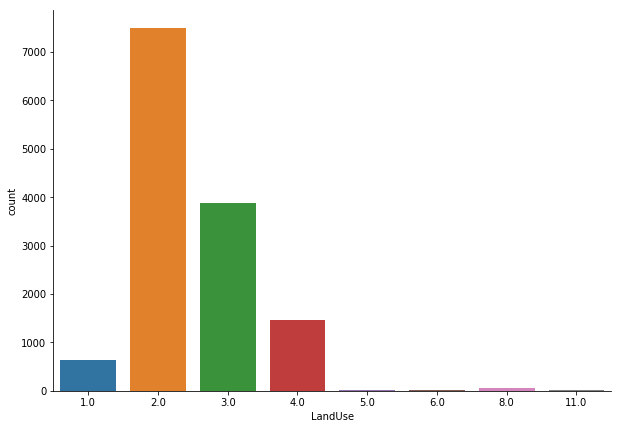

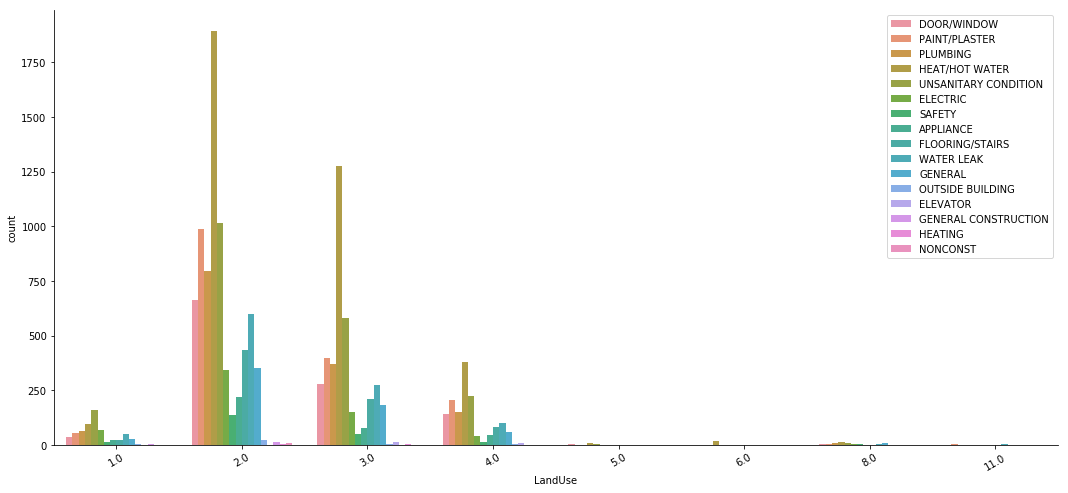

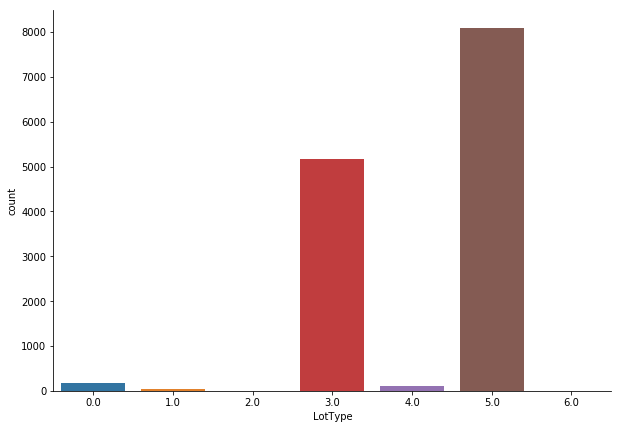

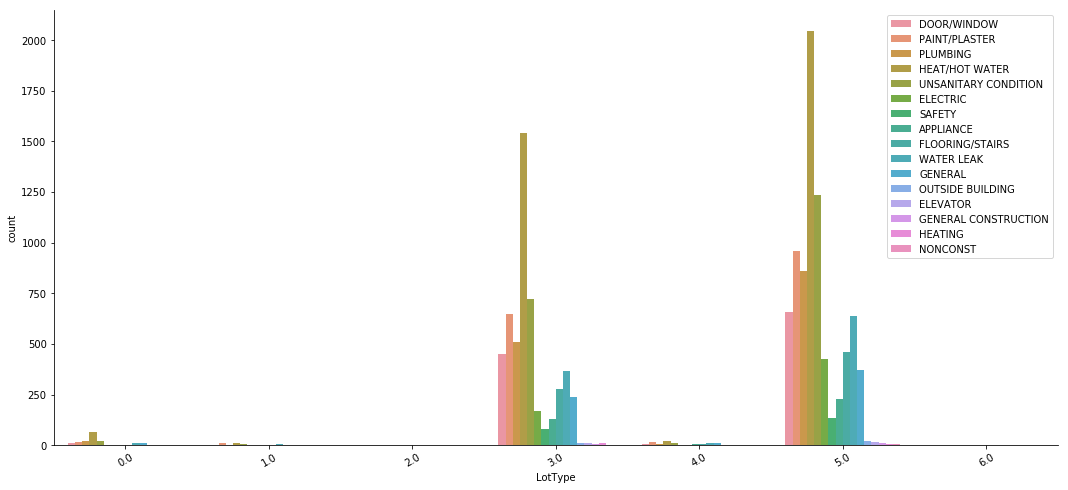

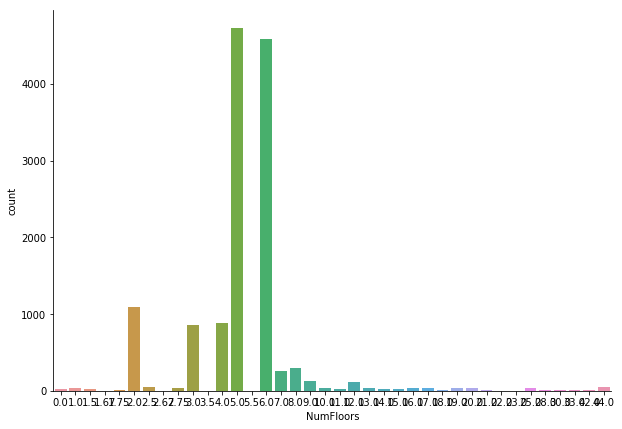

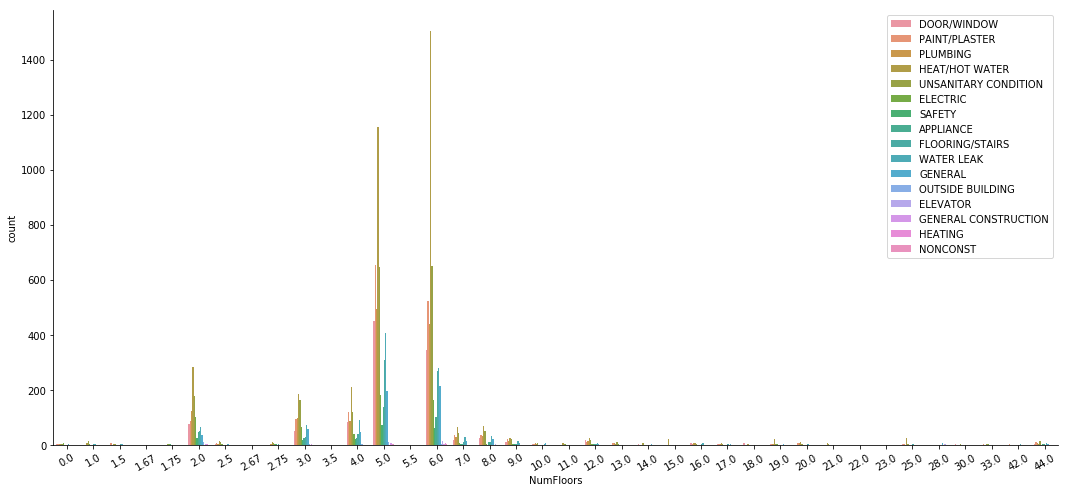

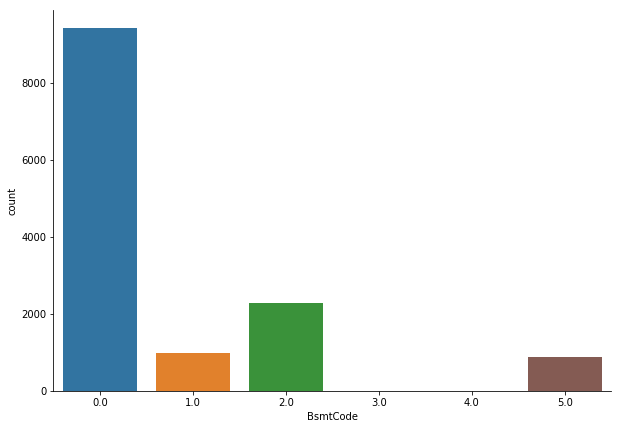

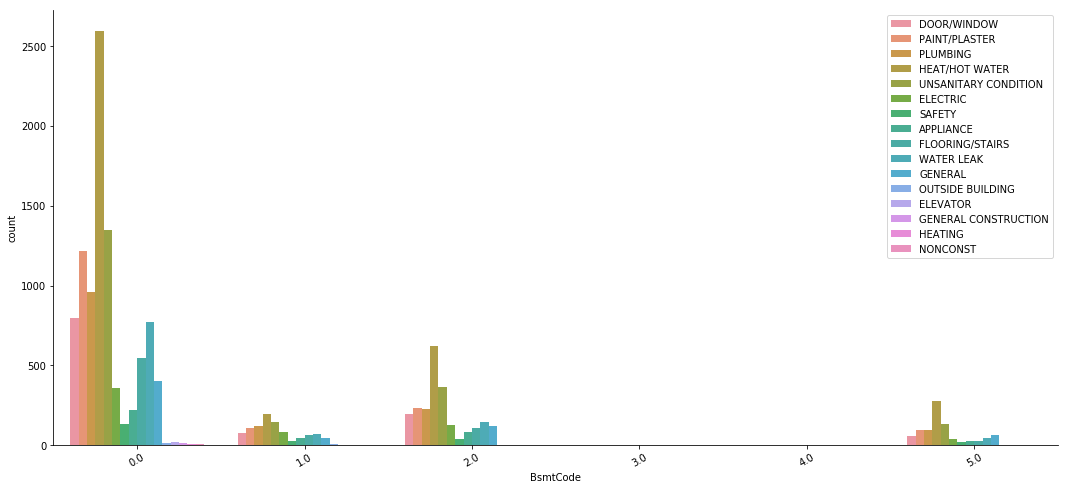

In [344]:
plt.figure(figsize=(10,7))
x = sns.countplot('LandUse', data=hpd_bk)
sns.despine()

plt.figure(figsize=(18,8))
g = sns.countplot('LandUse', data=hpd_bk, hue='complaint_type')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.legend(loc='upper right')
sns.despine()  

plt.figure(figsize=(10,7))
x = sns.countplot('LotType', data=hpd_bk)
sns.despine()

plt.figure(figsize=(18,8))
g = sns.countplot('LotType', data=hpd_bk, hue='complaint_type')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.legend(loc='upper right')
sns.despine()

plt.figure(figsize=(10,7))
x = sns.countplot('NumFloors', data=hpd_bk)
sns.despine()

plt.figure(figsize=(18,8))
g = sns.countplot('NumFloors', data=hpd_bk, hue='complaint_type')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.legend(loc='upper right')
sns.despine()

plt.figure(figsize=(10,7))
x = sns.countplot('BsmtCode', data=hpd_bk)
sns.despine()

plt.figure(figsize=(18,8))
g = sns.countplot('BsmtCode', data=hpd_bk, hue='complaint_type')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.legend(loc='upper right')
sns.despine()


### Observations from the visual analysis of categorical features
1. Landuse category 2.0 shows the max number of complaints
2. Lot type 3.0 and 5.0 are in abundance
3. Lots with 5 and 6 floors are in maximum numbers
4. Basment code 0.0 shows the max count

In [345]:
hpd_bk['unsanitary_condition'] = hpd_bk['complaint_type'].apply(lambda x: 1 if x=='UNSANITARY CONDITION' else 0)
hpd_bk['paintplaster'] = hpd_bk['complaint_type'].apply(lambda x: 1 if x=='PAINT/PLASTER' else 0)
hpd_bk['plumbing'] = hpd_bk['complaint_type'].apply(lambda x: 1 if x=='PLUMBING' else 0)
hpd_bk['heat/hot water'] = hpd_bk['complaint_type'].apply(lambda x: 1 if x=='HEAT/HOT WATER' else 0)

In [346]:
df1 = hpd_bk.groupby('YearBuilt').sum().sort_index()
df2 = hpd_bk['YearBuilt'].value_counts().sort_index()
df1['uc_prct'] = df1['unsanitary_condition']/df2
df1['pp_prct'] = df1['paintplaster']/df2
df1['pl_prct'] = df1['plumbing']/df2

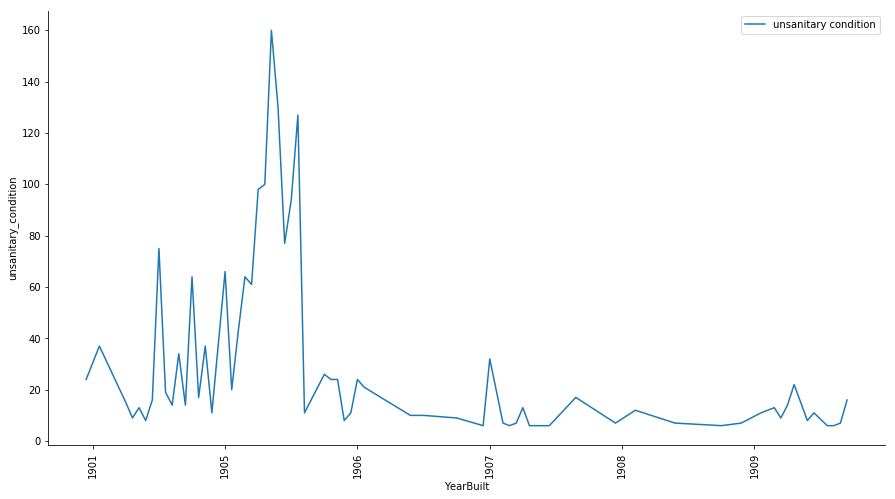

In [349]:
plt.figure(figsize=(15,8))
df1x = df1[df1['unsanitary_condition']>5]
s = sns.lineplot(df1x.index,df1x['unsanitary_condition'], label='unsanitary condition' )
#sns.kdeplot(df1.index,df1['pp_prct'], label='paint/plaster' )
#sns.lineplot(df1.index,df1['pl_prct'], label='plumbing' )
sns.despine()
s.set_xticklabels(df1x.index, rotation=90)
plt.legend()

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


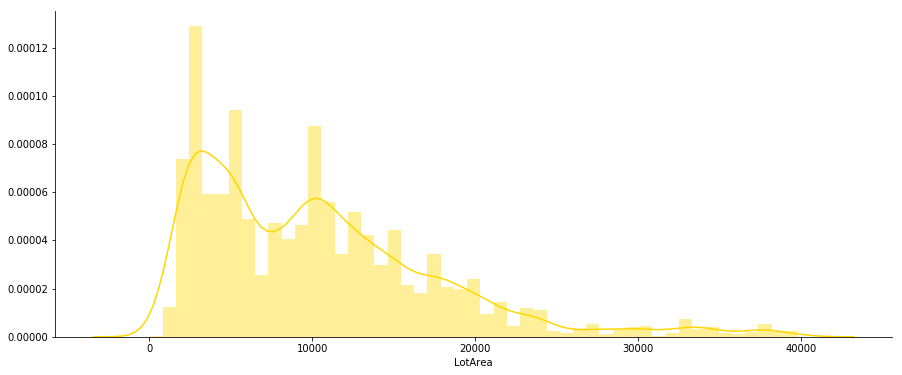

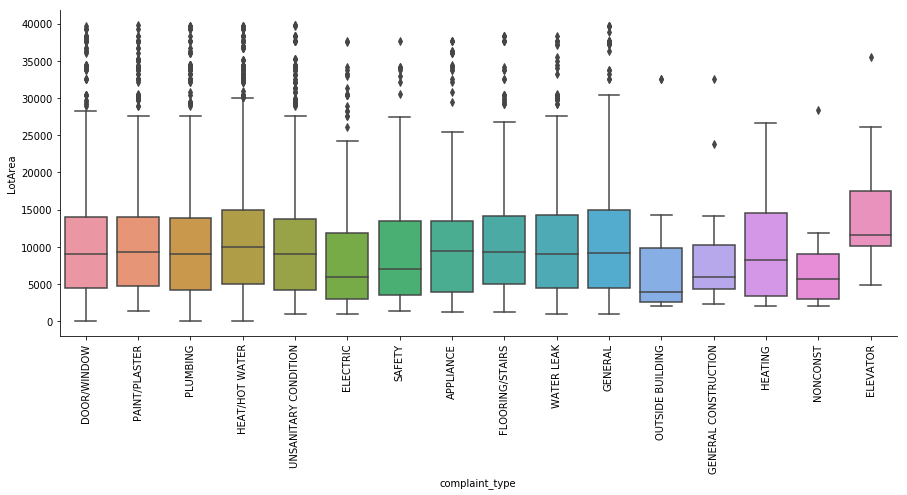

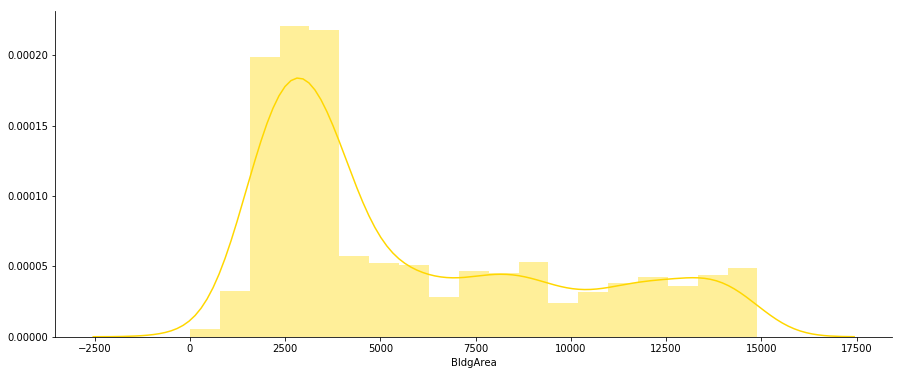

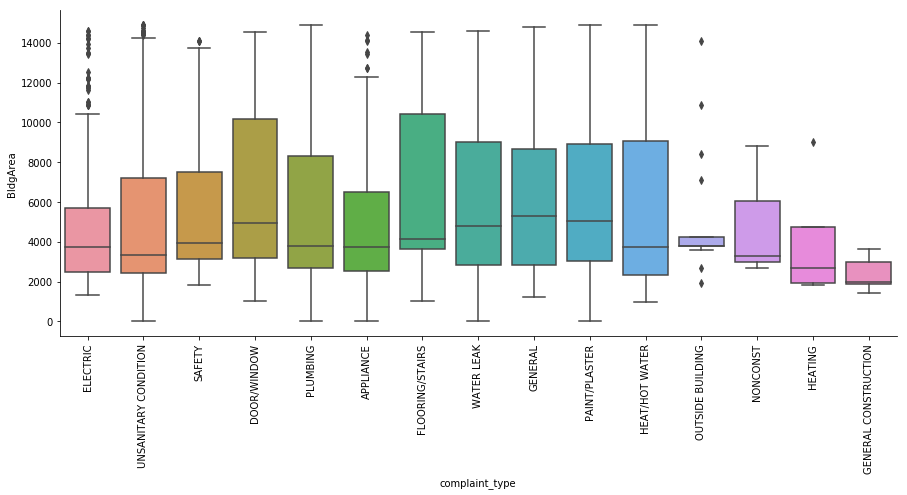

In [350]:
plt.figure(figsize=(15,6))
colors = ['#FFD700', '#7EC0EE']
sns.distplot(hpd_bk[hpd_bk['LotArea'] < 40000]['LotArea'], color = colors[0])
sns.despine()

plt.figure(figsize=(15,6))
g = sns.boxplot(x='complaint_type', y='LotArea', data=hpd_bk[hpd_bk['LotArea'] < 40000])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.despine()
plt.show()

plt.figure(figsize=(15,6))
colors = ['#FFD700', '#7EC0EE']
sns.distplot(hpd_bk[hpd_bk['BldgArea'] < 15000]['BldgArea'], color = colors[0])
sns.despine()

plt.figure(figsize=(15,6))
g = sns.boxplot(x='complaint_type', y='BldgArea', data=hpd_bk[hpd_bk['BldgArea'] < 15000])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.despine()
plt.show()

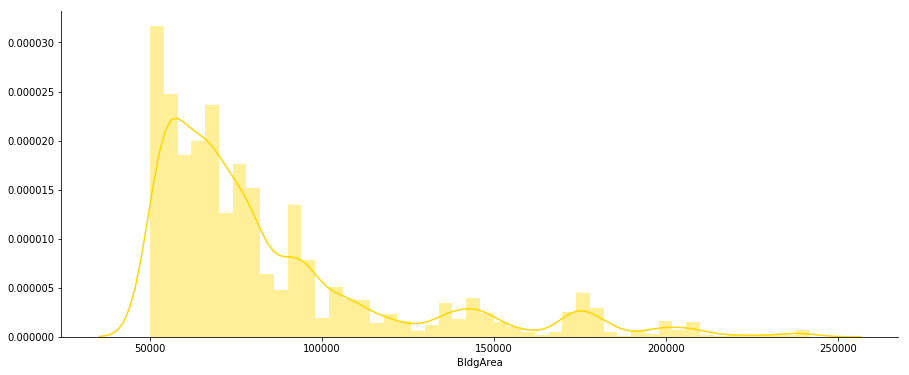

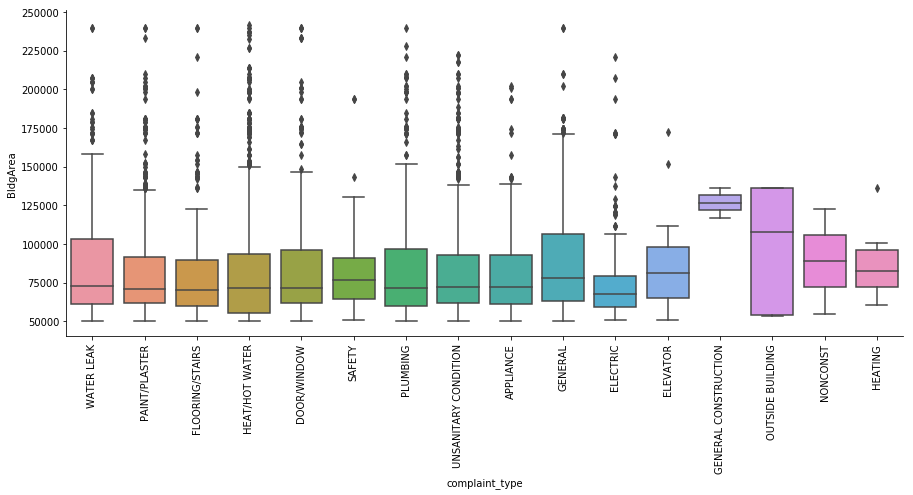

In [351]:
plt.figure(figsize=(15,6))
colors = ['#FFD700', '#7EC0EE']
sns.distplot(hpd_bk[(hpd_bk['BldgArea'] > 50000) & (hpd_bk['BldgArea'] < 250000)]['BldgArea'], color = colors[0])
sns.despine()

plt.figure(figsize=(15,6))
g = sns.boxplot(x='complaint_type', y='BldgArea', data=hpd_bk[(hpd_bk['BldgArea'] > 50000) & (hpd_bk['BldgArea'] < 250000)])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.despine()
plt.show()

### Observations from visual analysis of continous features
1. It seems houses built after 1906 doesn't have a lot of complaints
2. For most of the complaint types, mean lot area seems to be lies between 5000-10000

In [353]:
final_df = hpd_bk[['LandUse','LotArea','NumFloors','LotType','YearBuilt','BsmtCode','unsanitary_condition', 'paintplaster', 'heat/hot water']]

In [354]:
for item in ['LandUse','LotType','BsmtCode']:
    temp_df = pd.get_dummies(final_df[item], prefix=str(item))
    final_df = pd.concat([final_df, temp_df], axis=1)
    del final_df[item]

In [355]:
final_df

,LotArea,NumFloors,YearBuilt,unsanitary_condition,paintplaster,heat/hot water,LandUse_1.0,LandUse_2.0,LandUse_3.0,LandUse_4.0,LandUse_5.0,LandUse_6.0,LandUse_8.0,LandUse_11.0,LotType_0.0,LotType_1.0,LotType_2.0,LotType_3.0,LotType_4.0,LotType_5.0,LotType_6.0,BsmtCode_0.0,BsmtCode_1.0,BsmtCode_2.0,BsmtCode_3.0,BsmtCode_4.0,BsmtCode_5.0
0,9981,5.00,1915,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,9981,5.00,1915,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,9981,5.00,1915,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,9981,5.00,1915,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,5000,5.00,1907,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5,5000,5.00,1907,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
6,5000,5.00,1907,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
7,5000,5.00,1907,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,5000,5.00,1907,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
9,5000,4.00,1930,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [356]:
final_df.corr()[['unsanitary_condition', 'paintplaster', 'heat/hot water']]

,unsanitary_condition,paintplaster,heat/hot water
LotArea,0.005959,-0.006480,0.009808
NumFloors,0.000734,0.013378,0.007572
YearBuilt,0.008854,-0.023539,0.014848
unsanitary_condition,1.000000,-0.154669,-0.254078
paintplaster,-0.154669,1.000000,-0.227562
heat/hot water,-0.254078,-0.227562,1.000000
LandUse_1.0,0.068641,-0.023094,-0.058421
LandUse_2.0,-0.037345,0.034148,-0.047545
LandUse_3.0,0.005764,-0.037630,0.082114
LandUse_4.0,0.005302,0.020479,-0.007840


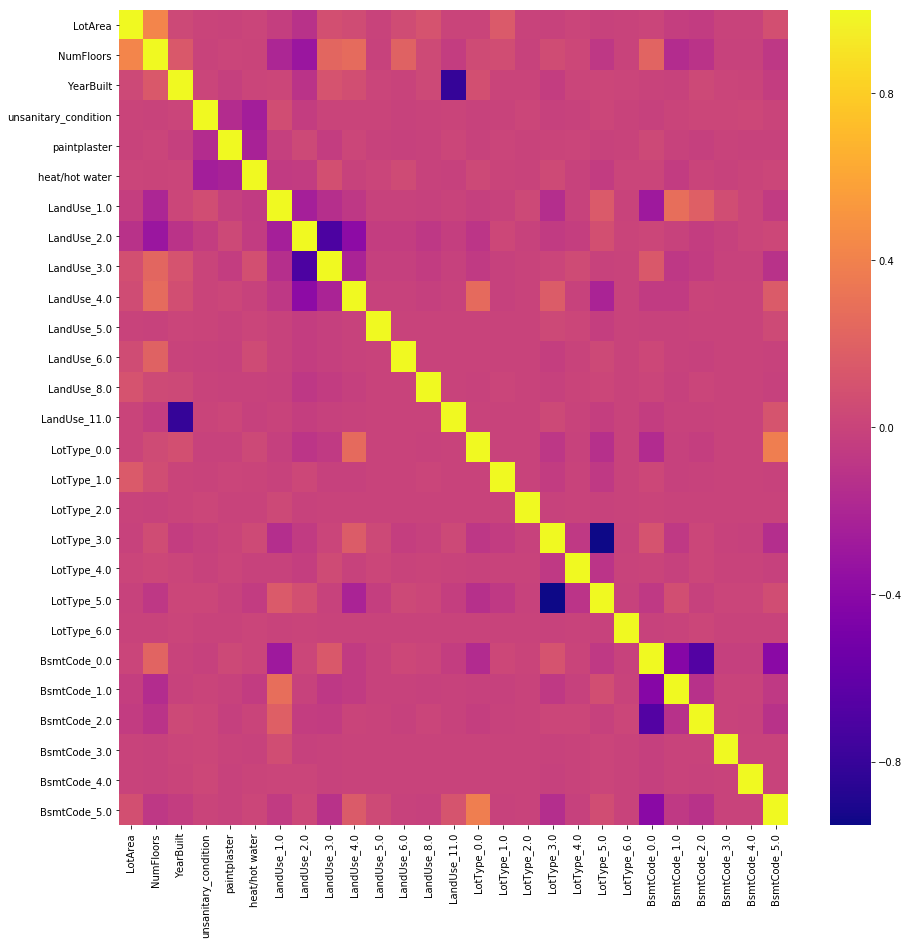

In [357]:
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(), cmap='plasma')

In [363]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rfc = RandomForestClassifier(n_estimators = 150, random_state = 1, min_samples_leaf = 4)

x_df = hpd_bk[['YearBuilt','LotType','LotArea',]]
y_df = hpd_bk['unsanitary_condition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=101)

rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(roc_auc_score(y_test, predictions))

0.515754478035758


In [364]:
np.sum(y_test == predictions)/len(predictions)

0.8485071876151862

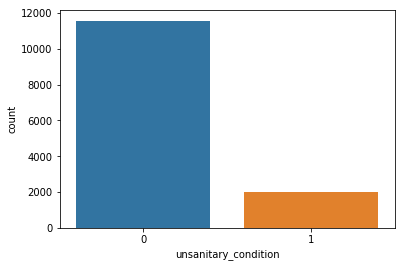

In [365]:
sns.countplot(hpd_bk['unsanitary_condition'])

In [366]:
y = pd.Series(list(y_test))
p = pd.Series(list(predictions))

In [367]:
Y = pd.DataFrame(columns=('actual', 'predicted'))

In [368]:
Y['actual'] = pd.Series(y_test)
Y['predicted'] = predictions

Y

,actual,predicted
8556,0,0
6606,1,0
11204,0,0
4737,0,0
7885,0,0
5743,0,0
10224,0,0
13309,0,0
4473,0,0
5013,0,0


In [369]:
fn = np.sum((Y['predicted']==0) & (Y['actual']==1))
tp = np.sum((Y['predicted']==1) & (Y['actual']==1))
tn = np.sum((Y['predicted']==0) & (Y['actual']==0))
fp = np.sum((Y['predicted']==1) & (Y['actual']==0))

fnr = fn/(fn+tp)
fnr

0.9667458432304038

In [376]:
penalty = {1:6, 0:1}

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(class_weight = penalty)
logit.fit(X_train, y_train)
l_predictions = logit.predict(X_test)

print(np.sum(y_test == l_predictions)/len(predictions))

l_y = pd.Series(list(y_test))
l_p = pd.Series(list(l_predictions))
l_Y = pd.DataFrame(columns=('actual', 'predicted'))
l_Y['actual'] = pd.Series(y_test)
l_Y['predicted'] = l_predictions

fn = np.sum((l_Y['predicted']==0) & (l_Y['actual']==1))
tp = np.sum((l_Y['predicted']==1) & (l_Y['actual']==1))
tn = np.sum((l_Y['predicted']==0) & (l_Y['actual']==0))
fp = np.sum((l_Y['predicted']==1) & (l_Y['actual']==0))

fnr = fn/(fn+tp)
print(fnr)

0.1551787688905271
0.0


C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We tried both random forrest and logistic regression classifiers. For both of them the accuracy is high, however that is only due to high class imbalance.

Looking into the false negative rate makes more sense.
With a penalised regression, we were able to achieve a zero fnr but that also resulted in a very low accuracy